# Functions in Python

We start with simple function $f\left(x\right) = x^2$

In [1]:
def f(x):
    return x**2

f(2)

4

The derivative of this function $f\left(x\right) = x^2$ will be:

In [2]:
def dfdx(x):
    return 2*x

print(dfdx(2))

4


## Plot f(x) and f'(x)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def plot_fx_dfdx(f, dfdx, x_min=-5, x_max=5, label1="f(x)", label2="f'(x)"):
    x = np.linspace(x_min, x_max, 100)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, f(x), 'r', label=label1)
    if not dfdx is None:
        if isinstance(dfdx, np.ndarray):
            plt.plot(x, dfdx, 'bo', markersize=3, label=label2)
        else:
            plt.plot(x, dfdx(x), 'b', label=label2)
    plt.legend()
    plt.show()
    

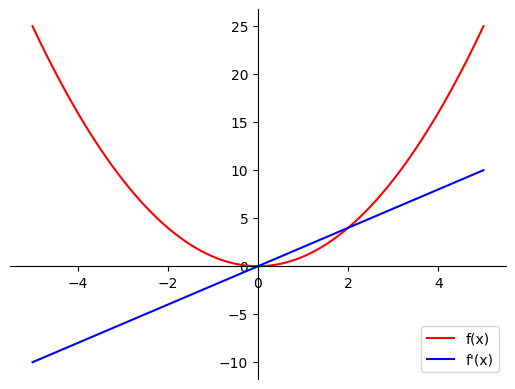

In [16]:
plot_fx_dfdx(f, dfdx)

## Symbolic Computation with SymPy

In [17]:
# show numbers
import math

math.sqrt(18)

4.242640687119285

In [29]:
from sympy import sqrt, N, symbols, expand, factor

In [27]:
sqrt(18)

3*sqrt(2)

In [22]:
N(sqrt(18), 8)

4.2426407

In [24]:
# List of symbols.
x, y = symbols('x y')
# Definition of the expression.
expr = 2 * x**2 - x * y
expr

2*x**2 - x*y

In [25]:
expr_manip = x * (expr + x * y + x**3)
expr_manip 

x*(x**3 + 2*x**2)

In [28]:
expand(expr_manip)

x**4 + 2*x**3

In [30]:
factor(expr_manip)

x**3*(x + 2)

In [31]:
expr.evalf(subs={x:-1, y:2})

4.00000000000000

In [32]:
f_symb = x ** 2
f_symb.evalf(subs={x:3})

9.00000000000000

In [35]:
x_array = np.array([1,3,6,6])
try:
    f_symb(x_array)
except TypeError as err:
    print(err)

'Pow' object is not callable


You need to make it possible to use numpy for this func. to do it...

In [36]:
from sympy.utilities.lambdify import lambdify
f_symb_np = lambdify(x, f_symb, 'numpy')
f_symb_np(x_array)

array([ 1,  9, 36, 36])

## Differentiation with SymPy

In [38]:
from sympy import diff
diff(x**3,x)

3*x**2

In [40]:
dfdx_composed = diff(exp(-2*x) + 3*sin(3*x), x)
dfdx_composed

9*cos(3*x) - 2*exp(-2*x)

make `diff(f_symb, x)` NumPy-friendly

In [ ]:
dfdx_symb = diff(f_symb, x)
dfdx_symb_np = lambdify(x, dfdx_symb, 'numpy')

Calculate differentiation:

In [43]:
print("x: \n", x_array)
print("f'(x) = 2x: \n", dfdx_symb_np(x_array))

x: 
 [1 3 6 6]
f'(x) = 2x: 
 [ 2  6 12 12]


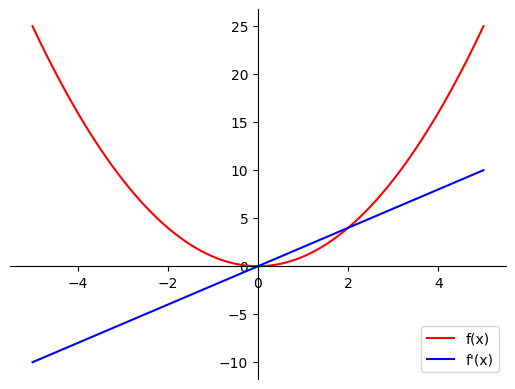

In [44]:
plot_fx_dfdx(f_symb_np, dfdx_symb_np)